# Part II - Prosper Loan: Factors Affecting Borrowers and Investors 
## by Banji R. Owabumoye


## Investigation Overview

> This project is based on [Prosper](https://www.prosper.com/). Prosper is an online loan company founded in the year 2005. The company offers a variety of resources people can use to try and improve their financial health, regardless of their financial situation.  
>The main objectives of this project are to consider factors affecting loan's outcome status, to examine determinant factors loan amount is based and examination of factors determinant to investors' decision.


## Dataset Overview

> The acquired Prosper loan dataset originally comprised 81 variables and 113,937 rows. After assessing and cleaning which included transforming of some variables, 26 variables and 83,520 rows were left for analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosper_loan.csv')

In [3]:
#categorizing values in 'ProsperRating (Alpha)', 'IncomeCategory', 'ListingCreationDay', and 'ListingCreationMonth' variables
order = {'ProsperRating (Alpha)':['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
         'IncomeCategory':['No-income','Very-low','Low','Average', 'High','Very-high'],
        'ListingCreationDay':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
        'ListingCreationMonth':['January','February','March','April','May','June','July','August',
                                'September','October','November','December']}
# Looping the variables to be converted to categorical variables
for i, v in order.items():
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = v)    
    prosper_loan[i] = prosper_loan[i].astype(ordered_var)

    
# Confirming the changes
prosper_loan[['ProsperRating (Alpha)','IncomeCategory','ListingCreationDay','ListingCreationMonth']].dtypes

ProsperRating (Alpha)    category
IncomeCategory           category
ListingCreationDay       category
ListingCreationMonth     category
dtype: object

## Likely Days Borrowers Could be Listed

It was amazing to realise that borrowers are likely to be listed on Mondays, Tuesdays, Wednesdays, Thursdays, and Fridays respectively than Saturdays and Sundays despite that Prosper loan is an online platform.

In [ ]:
# defining function for bar chart visualizations
def date_cat():
    """ploting of bar charts to reveal how borrowers were 
    listed by days    
    """
    color = 'royalblue'
    plt.figure(figsize = [18,16])  
    ax = sb.countplot(data = prosper_loan, 
                 x = 'ListingCreationDay',color = color)
    # Tittle and x-axis labeling 
    ax.set_xlabel('Listing Days', size = 12)
    ax.set_title('Listings by Days', size = 15)

date_cat()

## Borrowers' Income Category

Income category or income range seems to be an important factor affecting loan's outcome status. Borrowers that are in the categories of 'Low' and 'Average' are more than other categories. Borrowers with 'No-income' are least considered followed by borrowers in 'Very-low' income category'. Borrowers that are in 'High' and Very-high' income categories are quite above average.

A potential borrower that is employed on full-time has a very high chance to be listed, followed by those that are self-employed. 'Not-employed', 'Retired' and 'Part-time' have lesser chance.

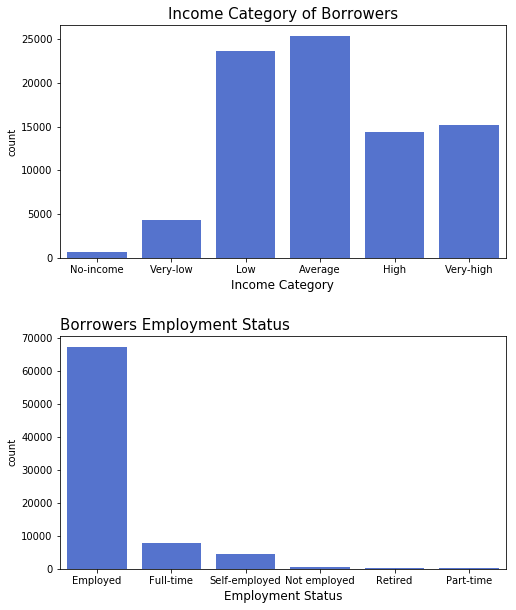

In [5]:
# Function for bar charts
def status_cat():
    """ploting of bar charts for income-category, and employment status    
    """
    color = 'royalblue'
    
    fig, ax = plt.subplots(nrows = 2, figsize = [8, 10])
    fig.subplots_adjust(hspace=0.335, wspace=0.335)
  
    sb.countplot(data = prosper_loan, 
                 x = 'IncomeCategory',color = color, ax = ax[0])
    
    sb.countplot(data = prosper_loan.query('EmploymentStatus !="Other"'),
                 x = 'EmploymentStatus', color = color, ax =ax[1])
    
    # Setting the axes labels and title
    ax[0].set_xlabel('Income Category', size = 12)
    ax[0].set_title('Income Category of Borrowers', size = 15)
    ax[1].set_xlabel('Employment Status', size = 12)
    ax[1].set_title('Borrowers Employment Status', size = 15, loc = 'left')

status_cat()

## Prosper Rating and Risk Score

Prosper rating ranges from the lowest to the highest (HR, E, D, C, B, A, AA) most borrowers are rated C followed by B, D, and A. Borrowers rated HR stand a lower chance of having a favorable loan outcome status.
Prosper risk score determines how risky a loan application is, which is dependent on the loan applicant. Prosper risk score ranges from highest risk (1.0) through lowest risk (11.0). Most borrowers are scored from 4.0 through 8.0.

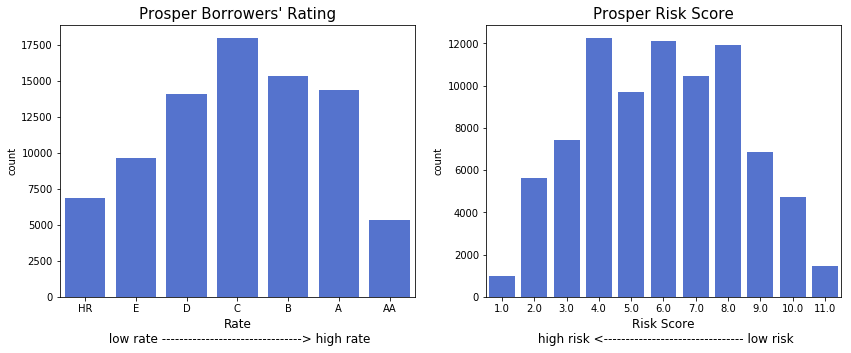

In [6]:
# Prosper loan rate and score charts
plt.figure(figsize = (14,5))

color = 'royalblue'
plt.subplot(1,2,1)
sb.countplot(data = prosper_loan, x = 'ProsperRating (Alpha)', color = color)
plt.xlabel('Rate\n low rate --------------------------------> high rate', size = 12)
plt.title("Prosper Borrowers' Rating", size = 15)

plt.subplot(1,2,2)
sb.countplot(data = prosper_loan, x = 'ProsperScore', color = color)
plt.xlabel('Risk Score\n high risk <-------------------------------- low risk', size = 12)
plt.title('Prosper Risk Score', size = 15);

## Borrowers' Monthly Income

The log transformation used for plotting the monthly income chart revealed that most borrowers are earning around 5,000 dollars that is, between 2,000 dollars and 10,000 dollars. This income range is inline with 'Low' and 'Average income categories.

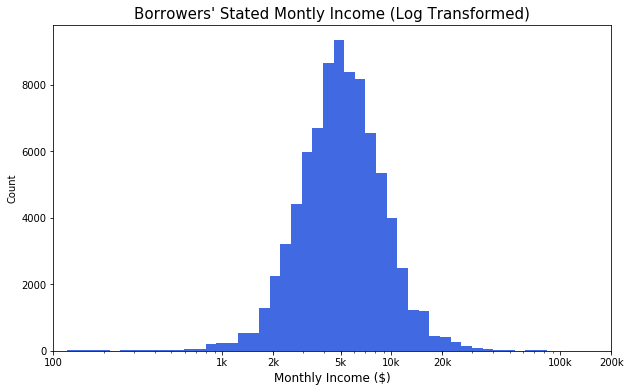

In [7]:
# Distribution of stated montly income
bins = 10 ** np.linspace(0, np.log10(prosper_loan['StatedMonthlyIncome'].max()), 100)

xticks = [100,1000,2000, 5000, 10000, 20000, 100000, 200000]
label = [100, '1k', '2k','5k','10k','20k', '100k','200k']
labels = ['{}'.format(k) for k in label]

plt.figure(figsize =(10,6))

plt.hist(data = prosper_loan, x = 'StatedMonthlyIncome', bins = bins, color = color)
plt.xscale('log')
plt.xticks(xticks, labels)
plt.xlim(100, 2e5)
plt.xlabel('Monthly Income ($)', size = 12)
plt.ylabel('Count')
plt.title("Borrowers' Stated Montly Income (Log Transformed)", size = 15);

## Investors by Proper Score and Loan Original Amount

There is a positive relationship between Prosper Score and Investors. The higher the Prosper Score, the higher the number of investors. This means that investors have confidence in Prosper Score to take investment decisions.
Likewisely, Investors and Loan Original Amount are positively correlated. The higher the loan amount the higher the number of investors that will fund the loan.

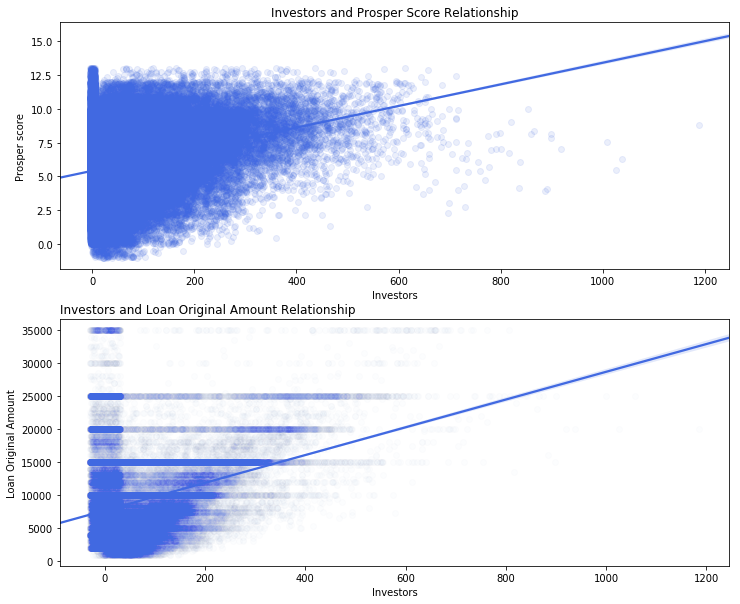

In [8]:
# Investors and prosper score, investors and loan original amount relationships
plt.figure(figsize =[12,10])

plt.subplot(2,1,1)
sb.regplot(data = prosper_loan, x = 'Investors', y = 'ProsperScore',
            color=color,scatter_kws={'alpha': 1/10}, x_jitter = 5, y_jitter = 2)
plt.xlabel('Investors')
plt.ylabel('Prosper score')
plt.title('Investors and Prosper Score Relationship')

plt.subplot(2,1,2)
sb.regplot(data = prosper_loan, x = 'Investors', y = 'LoanOriginalAmount',
            color=color,scatter_kws={'alpha': 1/100}, x_jitter = 30, y_jitter = 10)
plt.xlabel('Investors')
plt.ylabel('Loan Original Amount')
plt.title('Investors and Loan Original Amount Relationship', loc = 'left');

## Impact of Prosper Rate and Income Category on Investors' Decision

Findings between ProsperRating(Alpha) and Investors are quite insightful. The lowest rated borrowers (HR) hardly registered 1 investor solely taking the risk to invest in borrowers rated that so low. Most investors investing in borrowers rated so low are around 50 - 100 investors. Compared to borrowers rated E, D, C, B, A, and AA that have many sole investors that could take the risk of investing just because of ProsperRating. ProsperRating(Alpha) highly influence investors' decision.

IncomeCategory and Investor is closely similar to ProsperRating(Alpha) and Investors. Investors are mostly willing to invest their money on borrowers with income, especially from average income category upward.

In [9]:
# This is log function to transform 'Investors' and 'LoanOriginalAmount' variables.
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
prosper_loan['Log_Investors'] = prosper_loan['Investors'].apply(log_trans)

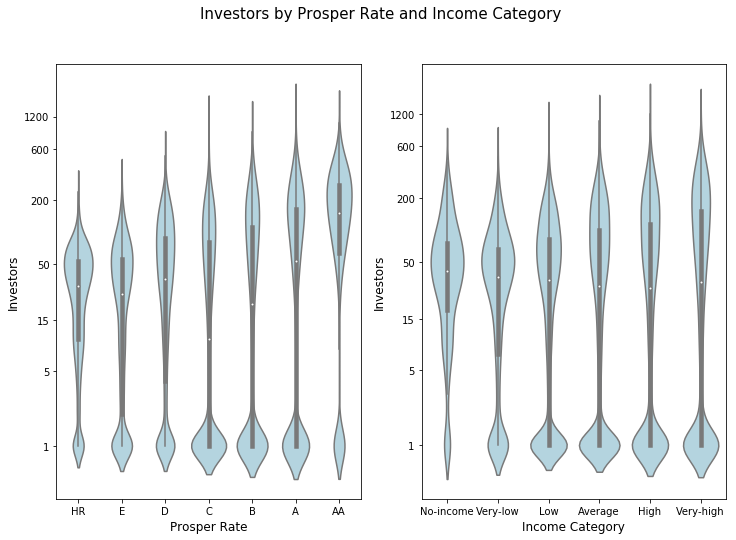

In [10]:
#This function is to plot charts needed to answer question 6
def investor_box():
    """This function will plot violinplot of investors vs Prosper Rate
    and investors vs Income Category"""
    
    fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize =[12,8])    

    plt.subplot(121)
    ax = sb.violinplot(data = prosper_loan, x = 'ProsperRating (Alpha)', y = 'Log_Investors', color = 'lightblue')
    plt.xlabel('Prosper Rate', size = 12)
    plt.ylabel('Investors', size = 12)
    ax.set_yticks(log_trans(np.array([ 1, 5, 15, 50, 200, 600, 1200])))
    ax.set_yticklabels(['1', '5', '15', '50', '200', '600', '1200'])

    plt.subplot(122)
    ax = sb.violinplot(data = prosper_loan, x = 'IncomeCategory', y = 'Log_Investors', color = 'lightblue')
    plt.xlabel('Income Category', size = 12)
    plt.ylabel('Investors', size = 12)
    ax.set_yticks(log_trans(np.array([ 1, 5, 15, 50, 200, 600, 1200])))
    ax.set_yticklabels(['1', '5', '15', '50', '200', '600', '1200'])
   
    
    plt.suptitle('Investors by Prosper Rate and Income Category', size = 15)
    
        
investor_box()

## How Prosper Rating Determines Loan Amount

It is worthy to note that those borrowers classified as 'No-income' in 'IncomeCategory' but rated from D, C, B, A, and AA in 'ProsperRating(Alpha)', received more loan amount on the average than borrowers that belong to 'Very-low' and 'Low' in the 'IncomeCategory'. Also, the third best rated (B) borrowers according to 'ProsperRating(Alpha)' received highest amount of loan.


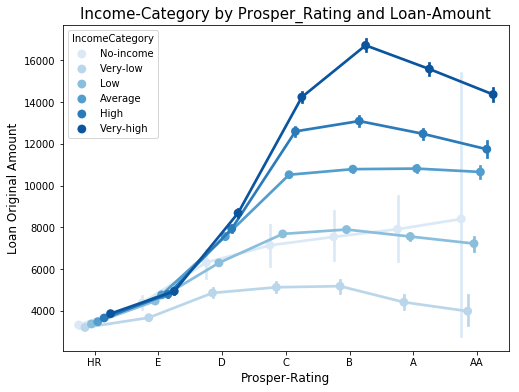

In [11]:
"""Plot for showing relationships between IncomeCategory, 
ProsperRating, StatedMonthlyIncome, LoanOriginalAmount and AmountDelinquent"""

plt.figure(figsize = [8,6])

sb.pointplot(data = prosper_loan, x = 'ProsperRating (Alpha)', 
             y = 'LoanOriginalAmount', hue = 'IncomeCategory', 
             dodge = 0.5, palette = 'Blues')
plt.xlabel('Prosper-Rating', size = 12)
plt.ylabel('Loan Original Amount', size = 12)
plt.title('Income-Category by Prosper_Rating and Loan-Amount', size = 15);


## Influence of Employment Status and Loan Amount on Loan Term

Borrowers in the employment status categories from 'Employed', 'Full-time', Self-employed', to 'Not employed' were mostly given loan around 5,000 dollars and these loans were short-term (12 months) and mid-term (36 months loan). Borrowers that are 'Retired', and 'Part-time' recorded no or little short-term loan. Long-term loans of 60 months around 10,000 dollars to 40,000 dollars were mostly offered to borrowers that are 'Employed' or/and 'Full-time'. This analysis has shown that employment status of borrowers has impact on amount of loan and loan term. combination of these features will affect loan outcome, amount of loan,and influence investors' decision on borrowers to invest on.

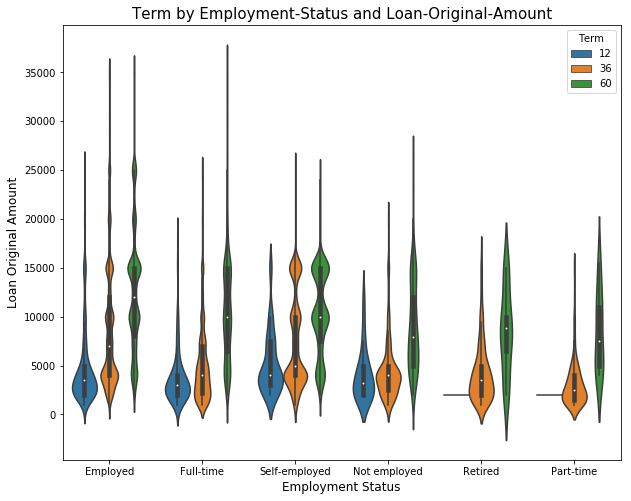

In [12]:
plt.figure(figsize =[10,8])

sb.violinplot(data = prosper_loan.query('EmploymentStatus != "Other"'), x = 'EmploymentStatus', y = 'LoanOriginalAmount',
          hue = 'Term')
plt.xlabel('Employment Status', size = 12)
plt.ylabel('Loan Original Amount', size = 12)
plt.title('Term by Employment-Status and Loan-Original-Amount', size = 15);

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Prosper_Loan.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Prosper_Loan.ipynb to slides
[NbConvertApp] Writing 820259 bytes to Part_II_Prosper_Loan.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Prosper_Loan.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser